# Workshop: Designing Your Own Database & Datapipeline

#### Tuesday May 12, 2020

We're hoping that this session will give you a chance do discuss how you might design your schema and tables in DataJoint. 

We ask that you think about how you might design a database for _your_ data, and come prepared with either **a diagram** that you can share on your screen or a skeleton of a **schema with a few empty tables** in a jupyter notebook (like the code below). There is no need to add/import any actual data - this is just about design!

We'll walk through your ideas and discuss various ways you might build your database.

Here are some considerations to take into account:

1. How much data do you have? What kind of data do you have? For example:
    * Behavioral Data
    * Calcium Data
    * Ephys Data


2. What does your "metadata" look like? How many primary and/or secondary keys might you need for each data type? For example:
    * Animals
    * Equipment
    
    
3. What kind of computation or analysis do you want to be done on your data? For example:
    * Statistics, e.g. calculating means and standard deviations
    * ROI selection, spike sorting, filtering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datajoint as dj

Connect to your database (see `hw5_part2.ipynb` if you are having trouble with this)

In [3]:
# connect to the database that you have already set up
# using simple username `root` and password `simple`
connection = dj.conn()

Please enter DataJoint username: root
Please enter DataJoint password: ········
Connecting root@localhost:3306


Reminder: The `@schema` decorator tells datajoint which "schema" this table class is assigned to in the MySQL database and it will automatically create the table in the database using the table class, if it does not yet exist in the MySQL database.

In [4]:
schema = dj.schema('workshop') # create my own schema

This was the example used in HW5. The tables can be saved in a separater `.py` file, but for this workshop feel free to define everything in a sinle `.ipynb`

In [10]:
@schema
class MouseID(dj.Manual):
    definition = """
    # mouse id table
    mouse_id : int  # id for mouse subject
    ---
    age : float # age of mouse in weeks
    sex : enum('F', 'M')  # sex of mouse
    comments = null : varchar(4000)
    """

@schema
class Drug(dj.AutoImported):
    definition = """
    # drug administered table
    -> MouseID
    drug : varchar(10) # full name of drug administered
    ---
    dose : float # dose of the drug given, in mg/kg
    route : enum('i.p.','s.c.','i.v.') # method of admistering
    comments = null : varchar(1000)
    """


@schema
class Behavior(dj.AutoImported):
    definition = """
    # behavior table
    -> MouseID
    -> Drug
    behavior_name : varchar(31) # short name for stimulus
    ---
    behavior_type : enum('anxiety','fear','depressive-like','motor','baseline') # beh type - *how to have raw data?
    duration : float # in minutes
    behavior_room : varchar(20)
    """


@schema
class RecordingSession(dj.AutoImported):
    definition = """
    # full mouse data
    -> MouseID
    -> Drug
    -> Behavior
    recording_id : int
    ---
    experimenter : varchar(100)
    recording_date : datetime # as 'YYYY-MM-DD HH:MM:SS'
    comments = null : varchar(4000)
    """
    
    
@schema
class RecordingData(dj.AutoImported):
    definition = """
    # data from the recording session 
    -> RecordingSession
    movie_id : int
    ---
    data : longblob
    """
    
    
@schema 
class Neurons(dj.AutoComputed):
    definition = """
    -> RecordingData
    neuron_number : int # neuron no. taken from CNMF-e?
    ---
    neurondata : longblob
    """
    
    
@schema
class Traces(dj.AutoComputed):
    definition = """
    -> RecordingData
    ---
    tracedata : longblob
    """


@schema
class Spikes(dj.AutoComputed):
    definition = """
    -> RecordingData
    ---
    spikedata : longblob
    """

In [9]:
mouse_subject = MouseID()
drug = Drug()
behavior = Behavior()

recording_session = RecordingSession()

In [10]:
mouse_subject

subject_id id for fly subject,age age of fly in days,sex sex of fly,comments


In [11]:
drug

stimulus_name short name for stimulus,stimulus_type,duration in seconds


In [12]:
behavior

subject_id id for fly subject,recording_id,stimulus_name short name for stimulus,experimenter,recording_quality,comments


## Print your ERD! (entity relationship diagram)

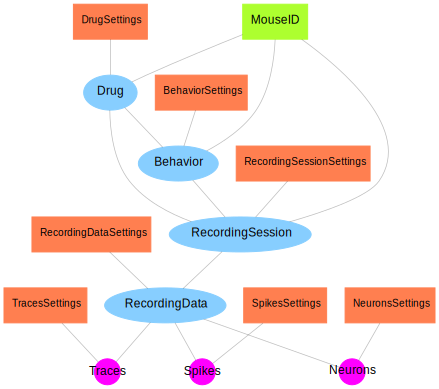

In [11]:
dj.ERD(schema)

In [14]:
schema.drop()

Proceed to delete entire schema `workshop`? [yes, No]: yes
